In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json
import requests
import time
from datetime import datetime
from IPython.display import display, clear_output
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
target_diff = 0.003
stop_loss = 0.003
units = 5000
profit = (target_diff / 0.0001)*0.75
loss = (stop_loss / 0.0001)*0.75
version = '10'

In [4]:
profit

22.5

In [5]:
filename_date = '100919'

layout = pd.read_csv('../data/' + filename_date + 'mds_out_layout.csv')
layout = layout['features'].values
data = pd.read_csv('../data/' + filename_date + 'mds_out.csv', usecols=layout)
data.shape

(16415, 785)

In [6]:
data['time'].min()

'2017-01-19 21:00:00'

In [7]:
data['time'].max()

'2019-09-24 19:00:00'

In [8]:
num_cols = ['ask_c', 'bid_c']

In [9]:
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')
data = data.drop_duplicates(subset=['time'])
data = data.reset_index(drop=True)
data['index'] = data.index
for n in num_cols:
    data[n] = pd.to_numeric(data[n])
data['target_sl'] = data['ask_c'] + stop_loss
data['target_tp'] = data['bid_c'] - target_diff
data = data[~data['target_tp'].isnull()]

In [10]:
data['diff'] = data['target_tp'] - data['target_sl']
data['diff'].describe()

count    16415.000000
mean        -0.006155
std          0.000097
min         -0.007500
25%         -0.006140
50%         -0.006130
75%         -0.006120
max         -0.006090
Name: diff, dtype: float64

In [11]:
# data[['index', 'time', 'volume', 'bid_o', 'bid_h','bid_l','bid_c', 'ask_o', 'ask_h','ask_l','ask_c', 'ask_prev_c', 'bid_prev_c', 'target_tp', 'target_sl', 'g', 'l', 'l_time']].head(40)

In [12]:
data['g']=np.NaN
data['l']=np.NaN
deep=len(data.index)
irange = data['index'].values
tp_good = False
sl_good = False

for i in irange:

#     while tp_good == False and sl_good == False:
    show = (i / len(irange))*100
    show = str(round(show, 2))
    show = show + ' - ' + str(datetime.now())
    display(show)
    tp_good = False
    sl_good = False
#     print(i)

    for r in irange:
#             print(i, r, tp_good, sl_good)
        if r > i:
            if tp_good == False and sl_good == False:
                if  data[data['index'] == r]['ask_h'].values[0] >= data[data['index'] == i]['target_sl'].values[0] and not tp_good:
                    data.at[i, 'g'] = data[data['index'] == r]['index'].values[0]
                    data.at[i, 'g_time'] = data[data['index'] == r]['time'].values[0]
                    tp_good = True
                else:
                    data.at[i, 'g'] = None
                    data.at[i, 'g_time'] =None

                if  data[data['index'] == r]['bid_l'].values[0] <= data[data['index'] == i]['target_tp'].values[0] and not sl_good:
                    data.at[i, 'l'] = data[data['index'] == r]['index'].values[0]
                    data.at[i, 'l_time'] = data[data['index'] == r]['time'].values[0]
                    sl_good = True
                else:  
                    data.at[i, 'l'] = None     
                    data.at[i, 'l_time'] = None  
            else:
                break

    clear_output()    

#     print(datetime.now())

In [13]:
# START WITH FIRST TARGET INDEX BEC TIME ISSUE

# if tp_good:
#     target_index = data['g'].max()
#     good_data = data[~data['g'].isnull()].copy()

# if sl_good:
#     target_index = data['l'].max()
#     good_data = data[~data['g'].isnull()].copy()

# tp_good = False
# sl_good = False
# done = False

# counter = 1
# while not done:
#     show = (target_index / len(irange))*100
#     show = str(round(show, 2))
#     show = show + ' - ' + str(datetime.now())
#     display(show)
#     tp_good = False
#     sl_good = False

#     for r in irange:
#         if r > target_index:
#             if tp_good == False and sl_good == False:
#                 if  data[data['index'] == r]['ask_h'].values[0] >= data[data['index'] == target_index]['target_tp'].values[0] and not tp_good:
#                     data.at[target_index, 'g'] = data[data['index'] == r]['index'].values[0]
#                     data.at[target_index, 'g_time'] = data[data['index'] == r]['time'].values[0]
#                     tp_good = True
#                 else:
#                     data.at[target_index, 'g'] = None
#                     data.at[target_index, 'g_time'] =None


#                 if  data[data['index'] == r]['bid_l'].values[0] <= data[data['index'] == target_index]['target_sl'].values[0] and not sl_good:
#                     data.at[target_index, 'l'] = data[data['index'] == r]['index'].values[0]
#                     data.at[target_index, 'l_time'] = data[data['index'] == r]['time'].values[0]
#                     sl_good = True

#                 else:  
#                     data.at[i, 'l'] = None     
#                     data.at[i, 'l_time'] = None  
#             else:
#                 break
    
#     if tp_good == True:
#         target_index = data['g'].max()
#         try:
#             temp = data[data['g'] == target_index].copy()
#             temp2 = data[data['index'] == target_index].copy()

#             if counter == 1:
#                 good_data = temp
#                 counter += 1
#             else:
#                 good_data = good_data.append(temp)

#             if target_index == data['index'].max():
#                 done = True
#         except IndexError:
#             done = True

#     elif sl_good == True:
#         target_index = data['l'].max()
#         try:
#             temp = data[data['l'] == target_index].copy()
#             temp2 = data[data['index'] == target_index].copy()

#             if counter == 1:
#                 good_data = temp
#                 counter += 1
#             else:
#                 good_data = good_data.append(temp)

#             if target_index == data['index'].max():
#                 done = True
#         except IndexError:
#             done = True
            
#     else:
#         done = True


#     clear_output()    

In [14]:
good_mask = (data['g'].isnull()) & (data['l'].isnull())
good_data = data[~good_mask].copy()
good_data.shape

(16398, 793)

In [15]:
good_data[['time', 'volume', 'bid_o', 'bid_h','bid_l','bid_c', 'ask_o', 'ask_h','ask_l','ask_c', 'target_tp', 'target_sl', 'g', 'l', 'l_time']].head(10)

,time,volume,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,target_tp,target_sl,g,l,l_time
0,2017-01-19 21:00:00,4461,1.06583,1.06612,1.06516,1.06530,1.06600,1.06632,1.06531,1.06546,1.06230,1.06846,1.0,NaN,NaN
1,2017-01-19 22:00:00,2878,1.06528,1.06871,1.06528,1.06808,1.06545,1.06888,1.06545,1.06821,1.06508,1.07121,NaN,9.0,1.484892e+18
2,2017-01-19 23:00:00,3073,1.06807,1.06834,1.06742,1.06767,1.06825,1.06847,1.06757,1.06781,1.06467,1.07081,NaN,9.0,1.484892e+18
3,2017-01-20 00:00:00,1888,1.06765,1.06929,1.06765,1.06847,1.06780,1.06943,1.06780,1.06861,1.06547,1.07161,NaN,9.0,1.484892e+18
4,2017-01-20 01:00:00,2733,1.06846,1.06853,1.06774,1.06797,1.06860,1.06867,1.06788,1.06811,1.06497,1.07111,NaN,9.0,1.484892e+18
5,2017-01-20 02:00:00,3330,1.06796,1.06809,1.06708,1.06716,1.06809,1.06823,1.06719,1.06731,1.06416,1.07031,NaN,9.0,1.484892e+18
6,2017-01-20 03:00:00,6519,1.06716,1.06856,1.06715,1.06820,1.06730,1.06868,1.06730,1.06839,1.06520,1.07139,NaN,9.0,1.484892e+18
7,2017-01-20 04:00:00,8151,1.06819,1.06915,1.06705,1.06715,1.06836,1.06928,1.06717,1.06727,1.06415,1.07027,NaN,10.0,1.484896e+18
8,2017-01-20 05:00:00,7173,1.06713,1.06831,1.06603,1.06626,1.06727,1.06845,1.06615,1.06639,1.06326,1.06939,NaN,10.0,1.484896e+18
9,2017-01-20 06:00:00,5923,1.06627,1.06665,1.06416,1.06459,1.06638,1.06678,1.06428,1.06470,1.06159,1.06770,15.0,NaN,NaN


In [16]:
def get_target(value):
    if value > 0:
        return 1
    else:
        return 0

In [17]:
# max_date = data['time'].max()
good_data['g_time'] = pd.to_datetime(good_data['g_time'])
good_data['l_time'] = pd.to_datetime(good_data['l_time'])

good_data['g'] = pd.to_numeric(good_data['g'])
good_data['l'] = pd.to_numeric(good_data['l'])

good_data['g'] = good_data['g'].fillna(0)
good_data['l'] = good_data['l'].fillna(0)

# data['g'] = data['g'].fillna(data['index'].max())
# data['l'] = data['l'].fillna(data['index'].max())

good_data['long_target'] = good_data['g'].apply(get_target)
good_data['short_target'] = good_data['l'].apply(get_target)

print(good_data['long_target'].value_counts())
print()
print(good_data['short_target'].value_counts())

0    8394
1    8004
Name: long_target, dtype: int64

1    8488
0    7910
Name: short_target, dtype: int64


In [18]:
# good_data['g_time_shift'] = good_data['g_time'].shift(1)
# good_data['g_time_shift'] = pd.to_datetime(good_data['g_time_shift'] )
good_data['time'] = pd.to_datetime(good_data['time'] )
# good_data['g_diff'] = good_data['g_time'] - good_data['g_time_shift']
# good_data['g_diff'] = good_data['g_diff'].dt.seconds

In [19]:
# good_data['order'] = good_data.index
# t1 = good_data[good_data['g'] != 0.0].drop_duplicates(subset='g')
# t2 = good_data[good_data['l'] != 0.0].drop_duplicates(subset='l')
# good_data = pd.concat([t1, t2], axis=0)
# good_data= good_data.sort_values(by='order')
good_data['same_time'] = good_data['g_time'] == good_data['l_time']
good_data['same_time'] = good_data['same_time'].apply(lambda x: 1 if x else 0)
good_data = good_data[good_data['same_time'] == 0]
good_data.shape

(16304, 796)

In [20]:
pos = good_data[good_data['short_target'] == 1].copy()
print(pos.shape)
neg = good_data[good_data['short_target'] == 0].copy()

pos['time_diff'] = (pos['l_time'] - pos['time']) / np.timedelta64(1, 'h')
pos_bad = pos[pos['time_diff'] > 24].copy()
pos_bad['short_target'] = 0

pos = pos[pos['time_diff'] <= 24]

pos.drop(['time_diff'], axis=1, inplace=True)
pos_bad.drop(['time_diff'], axis=1, inplace=True)

good_data = pd.concat([pos, neg, pos_bad], axis=0)
good_data.shape

(8394, 796)


(16304, 796)

In [21]:
good_data['short_target'].value_counts()

0    9538
1    6766
Name: short_target, dtype: int64

In [22]:
good_data.to_csv('../data/' + filename_date + '_mds_out_final_v' + version + '_short.csv', index=False, header=True)

In [23]:
good_data[['time', 'target_tp', 'target_sl', 'g', 'l', 'g_time', 'l_time', 'long_target', 'short_target', 'time']].head(10)

,time,target_tp,target_sl,g,l,g_time,l_time,long_target,short_target,time
1,2017-01-19 22:00:00,1.06508,1.07121,0.0,9.0,NaT,2017-01-20 06:00:00,0,1,2017-01-19 22:00:00
2,2017-01-19 23:00:00,1.06467,1.07081,0.0,9.0,NaT,2017-01-20 06:00:00,0,1,2017-01-19 23:00:00
3,2017-01-20 00:00:00,1.06547,1.07161,0.0,9.0,NaT,2017-01-20 06:00:00,0,1,2017-01-20 00:00:00
4,2017-01-20 01:00:00,1.06497,1.07111,0.0,9.0,NaT,2017-01-20 06:00:00,0,1,2017-01-20 01:00:00
5,2017-01-20 02:00:00,1.06416,1.07031,0.0,9.0,NaT,2017-01-20 06:00:00,0,1,2017-01-20 02:00:00
6,2017-01-20 03:00:00,1.06520,1.07139,0.0,9.0,NaT,2017-01-20 06:00:00,0,1,2017-01-20 03:00:00
7,2017-01-20 04:00:00,1.06415,1.07027,0.0,10.0,NaT,2017-01-20 07:00:00,0,1,2017-01-20 04:00:00
8,2017-01-20 05:00:00,1.06326,1.06939,0.0,10.0,NaT,2017-01-20 07:00:00,0,1,2017-01-20 05:00:00
25,2017-01-22 22:00:00,1.07136,1.07749,0.0,37.0,NaT,2017-01-23 10:00:00,0,1,2017-01-22 22:00:00
26,2017-01-22 23:00:00,1.07150,1.07763,0.0,37.0,NaT,2017-01-23 10:00:00,0,1,2017-01-22 23:00:00


In [24]:
shorts = good_data[good_data['short_target'] == 1].copy()
shorts['time'] = pd.to_datetime(shorts['time'])
shorts['l_time'] = pd.to_datetime(shorts['l_time'] )
shorts['time_diff'] = shorts['l_time'] - shorts['time']
shorts['time_diff'].head() 

1   08:00:00
2   07:00:00
3   06:00:00
4   05:00:00
5   04:00:00
Name: time_diff, dtype: timedelta64[ns]

In [25]:
shorts['time_diff'] = shorts['time_diff']  / np.timedelta64(1, 'h')

In [26]:
shorts['time_diff'].describe()

count    6766.000000
mean        9.553207
std         6.163939
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max        24.000000
Name: time_diff, dtype: float64

C:\Users\bbennett\Anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


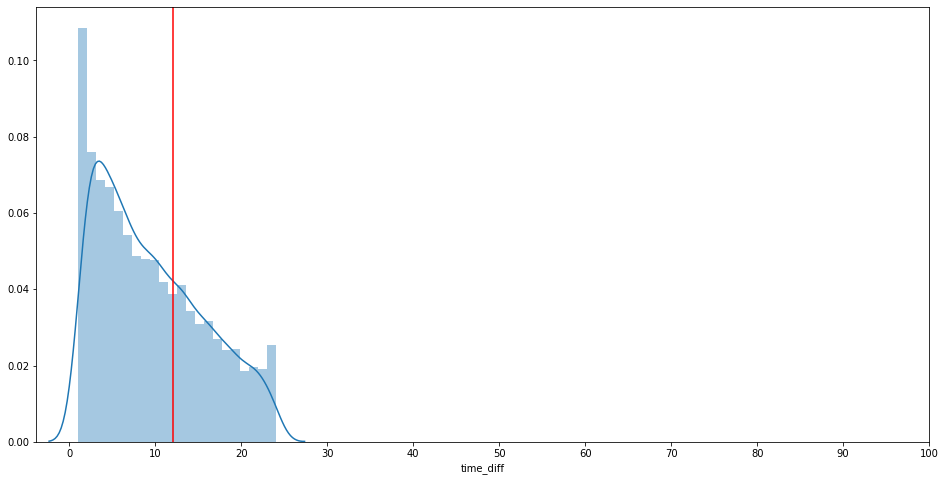

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(shorts['time_diff'])
ax.set_xticks(np.arange(0, 110, 10))
ax.axvline(x=12, color='red')

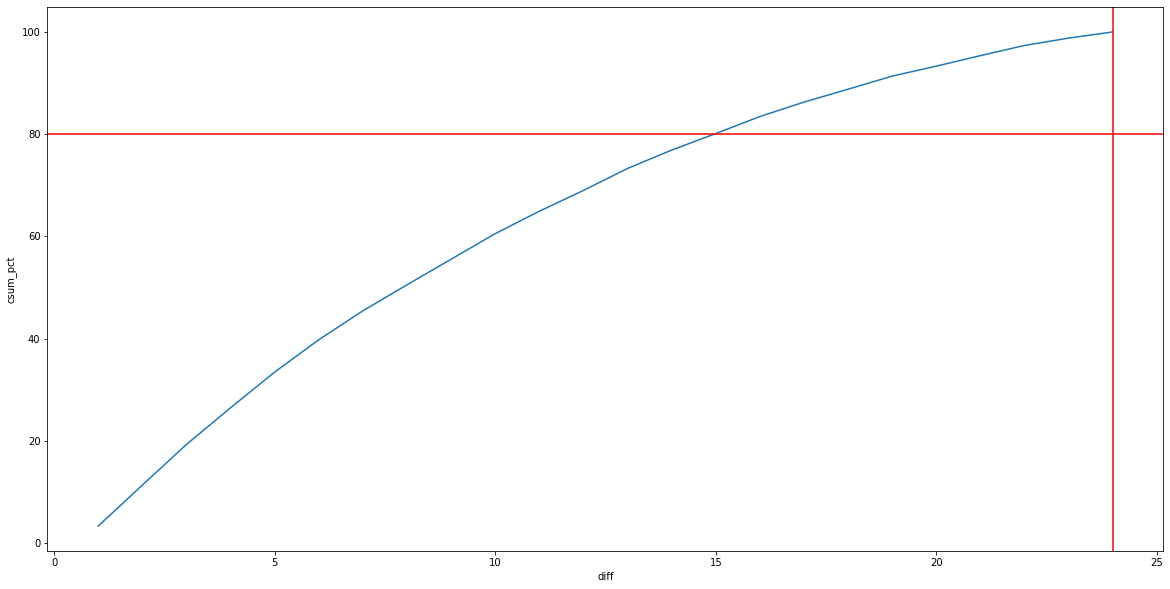

In [28]:
tcnt = shorts['time_diff'].value_counts().reset_index()
tcnt.columns = ['diff', 'count']
tcnt = tcnt.sort_values(by='diff')
tcnt['csum'] = tcnt['count'].cumsum()
tcnt['csum_pct'] = (tcnt['csum'] / tcnt['count'].sum()) * 100
tcnt['count_pct'] = (tcnt['count'] / tcnt['count'].sum()) * 100
tcnt['count_pct_ra']  = tcnt['count_pct'].rolling(8, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='diff', y='csum_pct', data=tcnt)
ax.axhline(y=80, color='red')
ax.axvline(x=24, color='red')

In [29]:
tcnt

,diff,count,csum,csum_pct,count_pct,count_pct_ra
13,1.0,226,226,3.340231,3.340231,3.340231
0,2.0,542,768,11.350872,8.010641,5.675436
1,3.0,538,1306,19.302394,7.951522,6.434131
2,4.0,486,1792,26.485368,7.182974,6.621342
3,5.0,472,2264,33.461425,6.976057,6.692285
4,6.0,428,2692,39.787171,6.325746,6.631195
5,7.0,383,3075,45.447827,5.660656,6.492547
6,8.0,344,3419,50.532072,5.084245,6.316509
7,9.0,339,3758,55.542418,5.010346,6.525273
8,10.0,338,4096,60.537984,4.995566,6.148389
